In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Here are some toy simulations of probability distributions. Just for fun amusement. I will try to make sure they are all generated from sampling a uniform distribution. I just want to learn these things better.

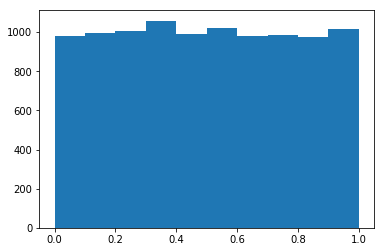

In [2]:
# just making sure a uniform is uniform
def uniform_dist(num_samples=1000):
    return np.random.uniform(0,1,num_samples)

samples = uniform_dist(10000)
plt.hist(samples)
plt.show()

In [4]:
# simulate a fair coin using a biased coin
def biased_coin(p):
    prob = np.random.uniform(0,1)
    if prob <= p:
        return 1
    else:
        return 0
    
samples = [biased_coin(0.7) for _ in range(5000)]
sum(samples) / len(samples)

0.6924

Okay, so we can get a biased coin. How about using a biased coin to simulate a fair coin?

In [6]:
def fair_coin(biased_p):
    b_coin1 = biased_coin(biased_p)
    b_coin2 = biased_coin(biased_p)
    if b_coin1 == b_coin2:
        return fair_coin(biased_p)
    else:
        if b_coin1 == 1:
            return 1
        else:
            return 0
        
samples = [fair_coin(0.7) for _ in range(5000)]
sum(samples) / len(samples)

0.5028

How about the opposite? Simulating a biased coin from a fair one? Since all fair coin flips give probabilties in chunks of $1/2^n$, we can take a binary expansion of $p=0.b_1b_2b_3...$ and flip the coin until a head pops up. If the $n$th flip is a head, then we take the value of $b_n$.

In [12]:
def to_bin(p):
    bin_p = []
    while p > 0:
        if p >= 0.5:
            p = 2*p-1
            bin_p.append(1)
        else:
            p = 2*p
            bin_p.append(0)
    return bin_p

def biased_from_fair(p_bin):
    n = len(p_bin)
    count = 0
    for i in range(n):
        coin = fair_coin(0.5)
        if coin == 1:
            return p_bin[count]
        else:
            count += 1
    return 0

In [14]:
p_bin = to_bin(0.75)
biased_from_fair(p_bin)

1

In [ ]:
samples = [biased_from_fair(p)]